# Table of Contents
 <p><div class="lev2 toc-item"><a href="#过程逻辑" data-toc-modified-id="过程逻辑-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>过程逻辑</a></div>

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy_indexed as npi
from sklearn.datasets.samples_generator import make_blobs

from itertools import combinations,permutations

In [154]:
def vdm(cols,clu):
    m_u = np.unique(cols,return_counts=True)
    vdm_value = np.zeros(len(list(combinations(m_u[0],2))))
    for k in np.unique(clu):
        m_ui = np.unique(cols[np.where(clu == k)],return_counts=True)
        m_ui0,m_ui1 = m_ui
        array_diff = np.setdiff1d(m_u[0],m_ui[0])
        print(array_diff)
        m_ui1 = np.append(m_ui1,[0]*len(array_diff))
        m_ui0 =  np.append(m_ui0,array_diff)
        print(m_ui0,m_ui1,)
        s_mui = sorted(zip(m_ui0,m_ui1),key=lambda x:x[0])
        s_mui1 = np.array([y for x,y in s_mui])
        clu_rate = zip(m_u[0],s_mui1/m_u[1])    
        clu_sq = [np.square(c[0][1]-c[1][1]) for c in combinations(clu_rate,2)]
        print(clu_sq)
        vdm_value += np.array(clu_sq)
        print(vdm_value)
    ret = dict(zip(combinations(m_u[0],2),vdm_value))
    return ret


In [155]:
class Kmean:
    def __init__(self,k,iter_num):
        self.k = k
        self.iter_num = iter_num
    def get_init_vector(self,X):
        distance,max_cores = 0,''
        for i in combinations(X,self.k):
            npt = np.array(list(combinations(i,2)))
            ret = np.sqrt(np.square(npt[:,0] - npt[:,1]).sum(axis=1)).sum()
            if ret > distance:
                distance,max_cores = ret,i
        return np.array(max_cores)

    def train(self,X):
        init_vetor = avg_vector = self.get_init_vector(X)
        get_nearcore = lambda x:np.argmin(np.square(avg_vector - x).sum(axis=1))
        cnt = 0
        while True:
            last_avg = avg_vector
            cnt += 1
            new_cluster = np.apply_along_axis(get_nearcore,axis=1,arr=X)
            clu_tag, avg_vector = npi.group_by(new_cluster).mean(data)
            if (np.square(avg_vector - last_avg).sum()< 0.01) or  (cnt >=self.iter_num):
                break
        return new_cluster

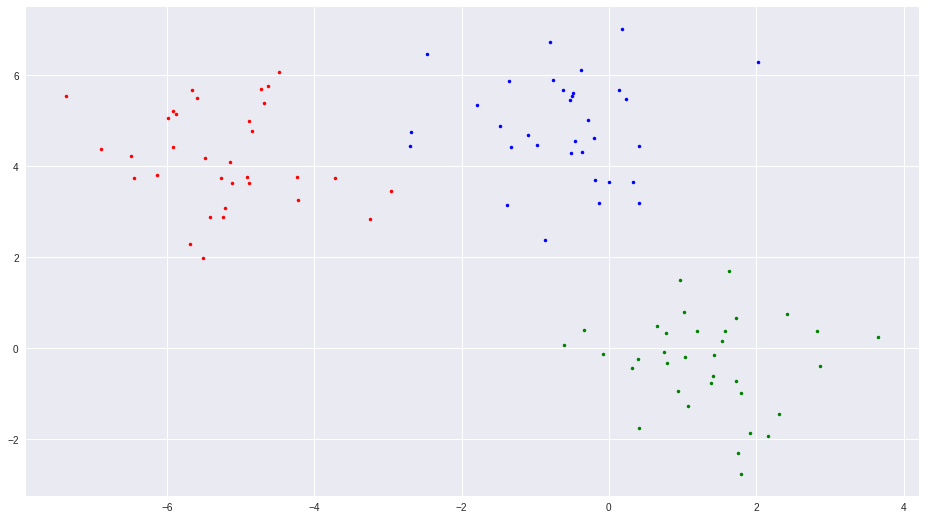

In [197]:
if __name__ == '__main__':
    data,clu = make_blobs(n_samples=100,n_features=2,centers=3)
    K = Kmean(3,10)
    cluster = K.train(data)
    plt.figure(figsize=(16,9))
    for x,y in zip(range(3),'gbr'):
        plt.plot(data[cluster==x][:,0],data[cluster==x][:,1],y+'.')
    

In [157]:
class DBSCAN:
    def __init__(self,e,MinPts):
        self.e = e
        self.MinPts = MinPts
    def train(self,X):
        m = X.shape[0]
        D_mat = np.zeros((m,m))
        for x,y in combinations(range(m),2):
            D_mat[x,y] = D_mat[y,x] = np.sqrt(np.square(X[x] - X[y]).sum())
        neibors = np.argwhere(np.logical_and(D_mat<self.e,D_mat!=0))
        nei_index,nei_cnt = np.unique(neibors[:,0],return_counts=True)
        core_obj = nei_index[nei_cnt>=self.MinPts]

        cluster= np.zeros(m)
        cluster_num = 1
        while core_obj.shape[0]>0:
            unread_set = np.argwhere(cluster==0)
            #print(core_obj)
            Q = np.random.choice(core_obj,1)
            neibor = np.argwhere(np.logical_and(D_mat[Q]<e,D_mat[Q]!=0))[:,1]
            unread_neibor = np.intersect1d(neibor,unread_set)
            while unread_neibor.shape[0]>0:
                cluster[unread_neibor] = cluster_num
                unread_set = np.argwhere(cluster==0)
                neibor = np.argwhere(np.logical_and(D_mat[unread_neibor]<self.e,D_mat[unread_neibor]!=0))[:,1]
                unread_neibor = np.intersect1d(neibor,unread_set)
            core_obj = np.intersect1d(core_obj,unread_set)
            cluster_num += 1
        return cluster


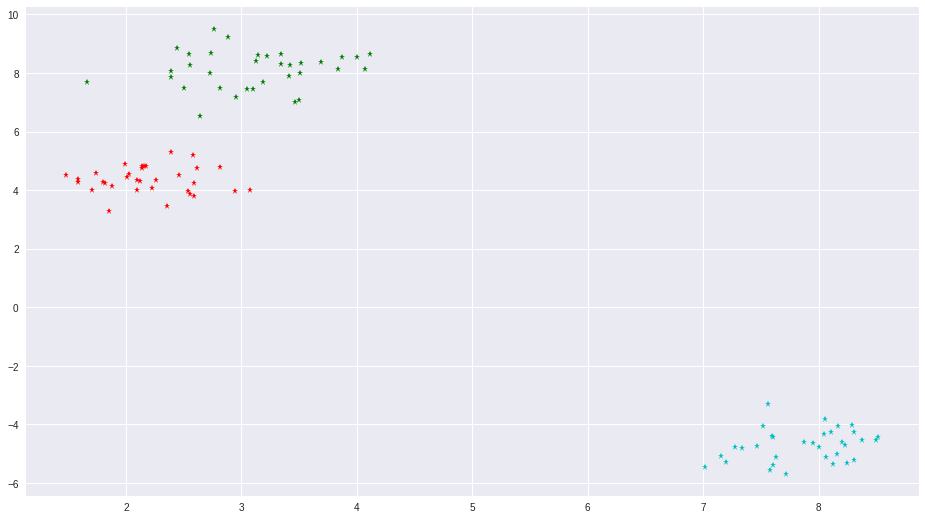

In [196]:
if __name__ == '__main__':
    m = 100
    n = 2
    k = 3
    D_mat = np.zeros((m,m))
    data,clu = make_blobs(n_samples=m,n_features=n,centers=3,cluster_std=0.5)

    DB = DBSCAN(1,6)
    clus = DB.train(data)
    plt.figure(figsize=(16,9))
    for x,y in zip(range(7),'bgrcmyk'):
        plt.plot(data[clus==x][:,0],data[clus==x][:,1],y+'*')